# RID

In [1]:
import pickle

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as implt

In [4]:
%matplotlib inline

In [5]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [6]:
cifar10 = unpickle('cifar-10-batches-py/data_batch_1')

In [7]:

d_decoded = {}
for k, v in cifar10.items():
    d_decoded[k.decode('utf8')] = v
d = d_decoded
data = d['data']
labels = d['labels']

data = data.reshape(data.shape[0], 3, 32, 32).transpose(0,2,3,1).astype('uint8')


In [9]:
len(labels)

10000

In [13]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [15]:
data.shape

(10000, 3, 32, 32)

In [29]:
data[0].shape

(3, 32, 32)

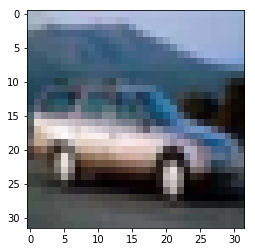

In [10]:
plt.imshow(data[4])

In [12]:
import scipy

In [72]:
from skimage import filters

In [75]:
from keras.preprocessing.image import array_to_img

In [108]:
data[4][:,:,2]

array([[198, 196, 203, ..., 215, 214, 212],
       [198, 201, 200, ..., 212, 211, 209],
       [186, 181, 162, ..., 214, 212, 209],
       ...,
       [ 80,  81,  82, ...,  78,  75,  68],
       [ 77,  78,  78, ...,  83,  78,  78],
       [ 78,  79,  76, ...,  82,  78,  80]], dtype=uint8)

In [78]:
imf = filters.sobel(data[4][:,:,0])

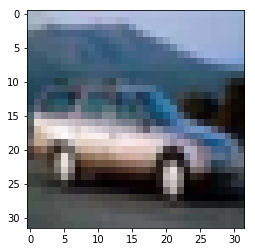

In [119]:
plt.imshow(data[4][:,:,:])

In [13]:
dat = scipy.ndimage.gaussian_filter(data[4], sigma=1)

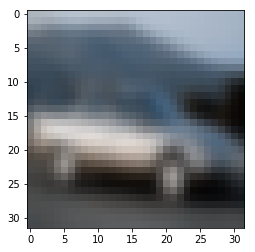

In [14]:
plt.imshow(dat)

In [16]:
gausdata = []
for img in data:
    gausdata.append(scipy.ndimage.gaussian_filter(img, sigma=1))

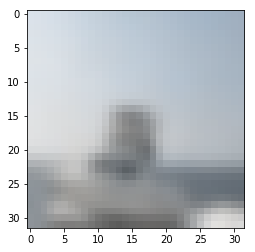

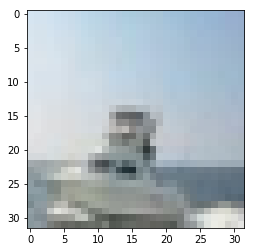

In [20]:
idx = 100
plt.imshow(gausdata[idx])
plt.figure(2)
plt.imshow(data[idx])

In [21]:
import numpy as np
import warnings

from keras.models import Model
from keras.layers import Flatten, Dense, Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import GlobalMaxPooling2D
from keras.layers import GlobalAveragePooling2D
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras import backend as K
from keras.applications.imagenet_utils import decode_predictions
from keras.applications.imagenet_utils import preprocess_input
from keras.applications.imagenet_utils import _obtain_input_shape
from keras.engine.topology import get_source_inputs

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
input_shape = _obtain_input_shape(None,
                                  default_size=32,
                                  min_size=48,
                                  data_format=K.image_data_format(),
                                  require_flatten=True)


img_input = Input(shape=input_shape)

In [25]:
classes = 2

In [26]:
# Block 1
x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(img_input)
x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

# Block 2
x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

# Block 3
x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv4')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

# Block 4
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv4')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

# Block 5
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv4')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)

# Classification block
x = Flatten(name='flatten')(x)
x = Dense(4096, activation='relu', name='fc1')(x)
x = Dense(4096, activation='relu', name='fc2')(x)
x = Dense(classes, activation='softmax', name='predictions')(x)

In [27]:
inputs = img_input
# Create model.
model = Model(inputs, x, name='vgg19')

In [28]:
from keras.optimizers import SGD

sgd = SGD(lr=0.01, clipnorm=1.)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [29]:
data.shape

(10000, 32, 32, 3)

In [33]:
train = np.append(data, gausdata, axis=0)

In [38]:
labels = np.append([0 for x in range(0, len(data))], [1 for x in range(0, len(data))], axis=0)

In [39]:
labels.shape

(20000,)

In [41]:
X_train, x_test, y_train, y_test = train_test_split(train, labels)

In [42]:
model.fit(X_train, y_train)

Epoch 1/1
15000/15000 [==============================] - 2307s 154ms/step - loss: 0.5742 - acc: 0.6743


In [45]:
model.fit(X_train, y_train, epochs=2)

Epoch 1/2
15000/15000 [==============================] - 2414s 161ms/step - loss: 0.3302 - acc: 0.8583
Epoch 2/2
15000/15000 [==============================] - 2398s 160ms/step - loss: 0.2322 - acc: 0.9055


In [44]:
(y_train)

array([0, 1])

In [46]:
from keras.preprocessing.image import load_img

In [47]:
img = load_img('buzova.jpg')

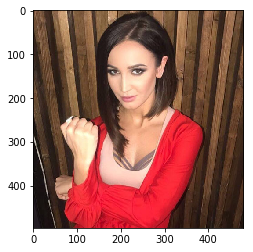

In [61]:
plt.imshow(img)

In [48]:
img.width, img.height

(480, 497)

In [65]:
arr = []
for x in range(0,480, 32):
    row = []
    for y in range(0, 497, 32):
        tmp = np.array(img.crop(box=(x, y, x + 32, y + 32)))
        
        row.append(tmp)
    arr.append(row)

In [67]:
ret = np.array(arr[4][4])
tt = ret.reshape((1,) + ret.shape)
pred = model.predict(tt)

In [68]:
pp = [np.argmax(x)for x in pred]

In [70]:
pp, pred

([1], array([[0.46297008, 0.5370299 ]], dtype=float32))

In [64]:
model.save("cifar10_e3.h5")

In [72]:
from keras.models import load_model

In [73]:
mm = load_model("cifar10_e3.h5")

In [74]:
mm.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
__________